# Error Formulas for Polynomial Collocation

**Last Revised on Wednesday February 17.**

This work is licensed under [Creative Commons Attribution-ShareAlike 4.0 International](https://creativecommons.org/licenses/by-sa/4.0/)

---

**References:**
- Section 3.2.1 *Interpolation error formula* of [Sauer](../references.html#Sauer)
- Section 3.1 *Interpolation and the Lagrange Polynomial* of [Burden&Faires](../references.html#Burden-Faires)
- Section 4.2 *Errors in Polynomial Interpolation* of [Chenney&Kincaid](../references.html#Chenney-Kincaid)

## Introduction

When a polynomial $P_n$ is given by collocation to $n+1$ points $(x_i, y_i)$, $y_i = f(x_i)$ on the graph of a function $f$, one can ask how accurate it is as an approximation of $f$ at points $x$ other than the nodes: what is the error $E(x) = f(x) - P(x)$?

As is often the case, the result is motivated by considering the simplest "non-trival case":
$f$ a polynomial of degree one too high for an exact fit, so of degree $n+1$.
The result is also analogous to the familiar error formula for Taylor polynonial approximations.

In [1]:
from numpy import linspace, polyfit, polyval, ones_like
from  matplotlib.pyplot import figure, plot, title, grid, legend

## Error in $P_n(x)$ collocating a polynomial of degree $n+1$

With $f(x) = c_{n+1} x^{n+1} + c_{n} x^{n} + \cdots + c_0$ a polynomial of degree $n+1$ and $P_n(x)$ the unique polynomial of degree at most $n$ that collocates with it at the $n+1$ nodes $x_0, \dots x_n$, the error

$$ E_n(x) = f(x) - P(x) $$

is a polynomial of degree $n+1$ with all its roots known: the nodes $x_i$.
Thus it can be factorized as

$$\begin{split}
E_n(x) &= C (x-x_0) \cdot (x-x_1) \cdots (x-x_n)\\
       &= Cx^{n+1} + \text{lower powers of $x$.}
\end{split}$$

On the other hand, the only term of degree $x^{n+1}$ in $f(x) - P(x)$ is the leading term of $f(x)$, $c_{n+1} x^{n+1}$.
Thus $C = c_{n+1}$.

It will be convenient to note that the order $n+1$ derivative of $f$ is the constant
$f^{(n+1)}D^{n+1}f(x) = (n+1)! c_{n+1}$, so the error can be written as

$$
E_n(x) = f(x) - P_n(x) = \frac{D^{n+1}f(x)}{(n+1)!} (x-x_0) \cdots (x-x_n)
= \frac{D^{n+1}f(x)}{(n+1)!}\prod\limits_{i=0}^n (x - x_i).
$$

## Error in $P_n(x)$ collocating a sufficiently differentiable function

**Theorem 1.**
For a function $f$ with continuous derivative of order $n+1$ $D^{n+1}f$,
the polynomial $P_n$ of degree at most $n$ that fits the points $(x_i, f(x_i))$ $0 \leq i \leq n$ differs from $f$ by

$$
E_n(x) = f(x) - P_n(x) = \frac{D^{n+1}f(\xi_x)}{(n+1)!}\prod\limits_{i=0}^n (x - x_i)
$$

for some value of $\xi_x$ that is amongst the $n+2$ points $x_0, \dots x_n$ and $x$.

In particular, when $a \leq x_0 < x_1 \cdots < x_n \leq b$ and $x \in [a,b]$, then also $\xi_x \in [a, b]$.

Note the similarity to the error formula for the Taylor polynomial $p_n$ with center $x_0$:

$$
e_n(x) = f(x) - p_n(x) = \frac{D^{n+1}f(\xi)}{(n+1)!} (x-x_0)^{n+1},\, \text{some $\xi$ between $x_0$ and $x$.}
$$

This is effectively the limit when all the $x_i_x$ congeal to $x_0$.

## Error bound with equally spaced nodes is $O(h^{n+1})$, but ...

An important special case is when there is a single parameter $h$ describing the spacing of the nodes; when they are the equally spaced values $x_i = a + i h$, $0 \leq i \leq n$, so that $x_0 = a$ and $x_n = b$ with $h = \displaystyle \frac{b-a}{n}$.
Then there is a somewhat more practically usable error bound:

**Theorem 2.**
For $x \in [a,b]$ and the above equaly spaced nodes in that interval $[a,b]$,

$$
| E_n(x) | = \left| f(x) - P_n(x)\right| \leq \frac{M_{n+1}}{n+1} h^{n+1}, = O(h^{n+1}),
$$

where $M_{n+1} = \max\limits_{x \in [a,b]} | D^{n+1}f(x)|$.

## Possible failure of convergence

A major practical problem with this error bound is that is does not in general guarantee convergence
$P_n(x) \to f(x)$ as $n \to \infty$ with fixed interval $[a, b]$, because in some cases $M_{n+1}$ grows too fast.

A famous example is the "Witch of Agnesi" (so-called because it was introduced by Maria Agnesi,
author of the first textbook on differential and integral calculus).

In [2]:
def agnesi(x):
    """An example sometime know as "the Witch of Agnesi",
    after 
    """
    return 1/(1+x**2)

In [3]:
def graph_agnesi_collocation(a, b, n):
    figure(figsize=[12, 6])
    title(f"The Witch of Agnesi and collocating polynomial of degree {n=}")
    x = linspace(a, b, 200)  # Plot 200 points instead of the default 50, as some fine detail is needed
    agnesi_x = agnesi(x)
    plot(x, agnesi_x, label="Witch of Agnesi")
    x_nodes = linspace(a, b, n+1)
    y_nodes = agnesi(x_nodes)
    c = polyfit(x_nodes, y_nodes, n)
    P_n = polyval(c, x)
    plot(x_nodes, y_nodes, 'r*', label="Collocation nodes")
    plot(x, P_n, label="P_n(x)")
    legend()
    grid(True)

    figure(figsize=[12, 6])
    title(f"Error curve")
    E_n = P_n - agnesi_x
    plot(x, E_n)
    grid(True)

Start with $n=4$, which seems somewhat well-behaved:

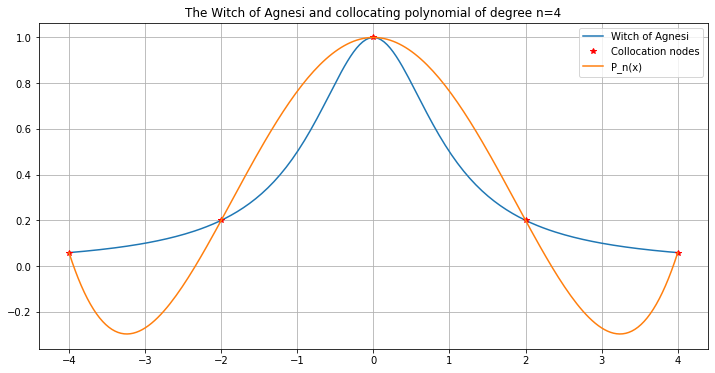

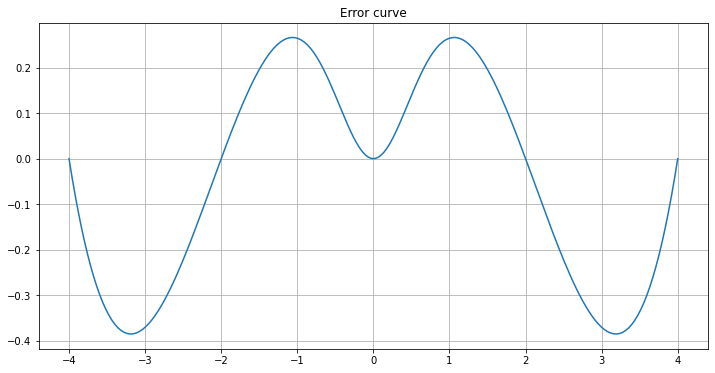

In [4]:
graph_agnesi_collocation(a=-4, b=4, n=4)

Now increase the number of inervals, doubling each time.

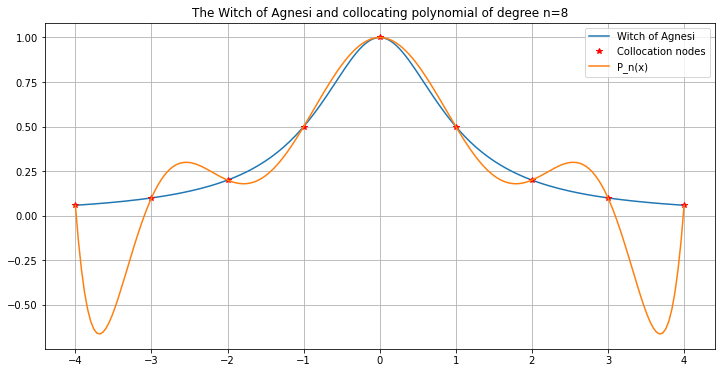

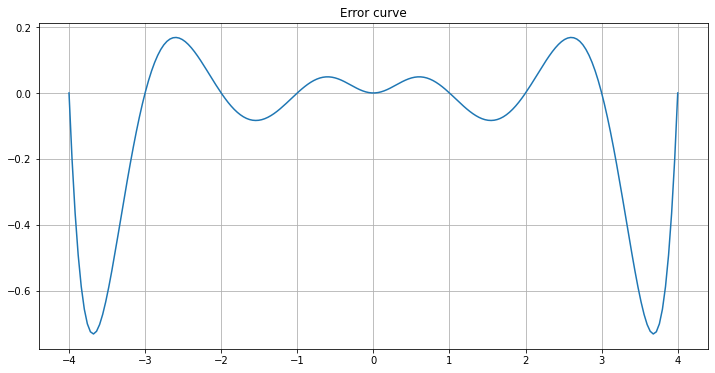

In [5]:
graph_agnesi_collocation(a=-4, b=4, n=8)

The curve fits better in the central part, but gets worse towards the ends!

One hint as to why is to plot the polynomial factor in the error formula above:

In [6]:
def graph_error_formula_polynomial(a, b, n):
    figure(figsize=[12, 6])
    title(f"The polynomial factor in the error formula for degree {n=}")
    x = linspace(a, b, 200)  # Plot 200 points instead of the default 50, as some fine detail is needed
    x_nodes = linspace(a, b, n+1)
    polynomial_factor = ones_like(x)
    for x_node in x_nodes:
        polynomial_factor *= (x - x_node)
    plot(x, polynomial_factor)
    grid(True)

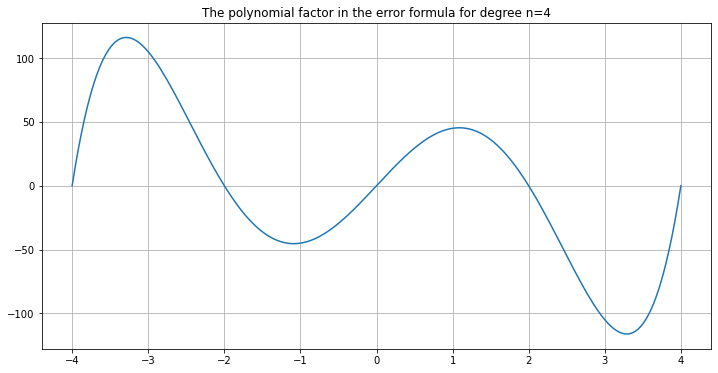

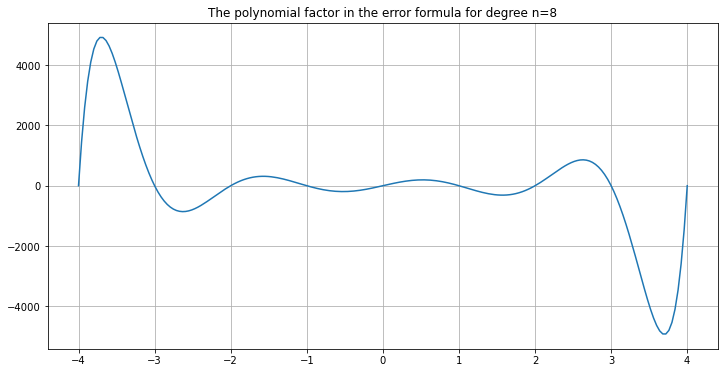

In [7]:
graph_error_formula_polynomial(a=-4, b=4, n=4)
graph_error_formula_polynomial(a=-4, b=4, n=8)

As n increases, it just gets worse:

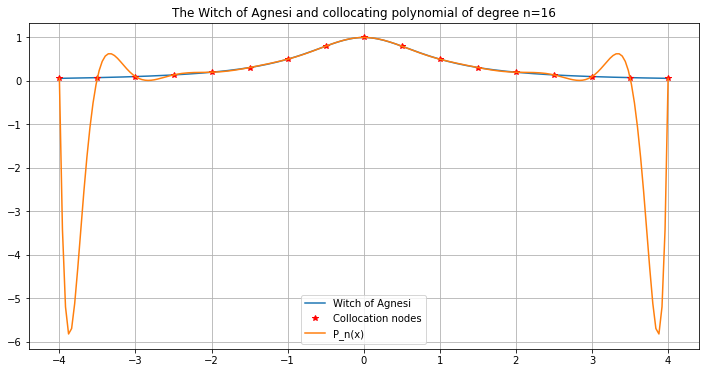

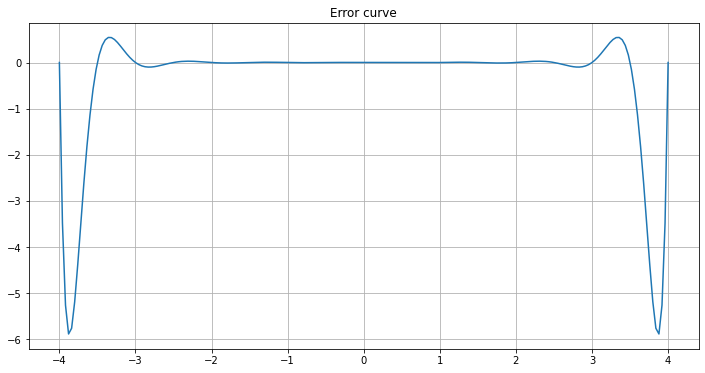

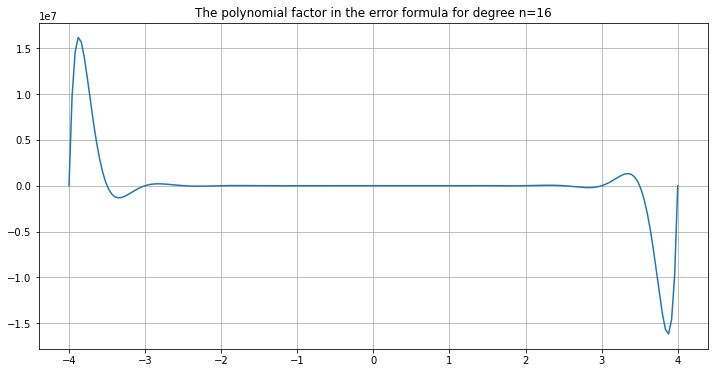

In [8]:
graph_agnesi_collocation(a=-4, b=4, n=16)
graph_error_formula_polynomial(a=-4, b=4, n=16)

## A Solution: piecewise (linear) interpolation

A solution to this problem is to use collocation with just a fixed number of nodes $m$ as $h \to 0$ and the total node count $n \to \infty$.
That is, for each $x$, approximate $f(x)$ using just data from a suitable choice of $m+1$ nodes near $x$.
Then $M_{m+1}$ is a constant, and one has the convergence result

$$
| E_n(x) \leq \frac{M_{m+1}}{m+1} h^{m+1}, = O(h^{m+1}), = O(1/n^{m+1})
$$

so long as $f$ has a continuous derivatives up to order $m+1$.

But then how does one get an approximation over a fixed interval of interest, $[a, b]$?

One solution is to use multiple polynomials, by dividing the interval into numerous small ones.
The simplest version of this is to divide it into $n$ sub-intervals of equal width $h=(b-a)/n$, separated at nodes
$x_i = a + i h$, $0 \leq i \leq n$, and approximate $f(x)$ *linearly* on each sub-inerval by using the two surrounding nodes $x_i$ and $x_{i+1}$ determined by having $x_i \leq x \leq x_{i+1}$:
this is **piecewise linear interpolation.**

This gives the approximating function $L_n(x)$,
and the above error formula, now with $m=1$ says that the worst absolute error anywhere in the interval $[a, b]$ is

$$
|E(x)| = |f(x) - L_n(x)| \leq \frac{M_2}{2} h^2 = \frac{M_2 (b-a)^2}{2 n^2}, = O(1/n^2),
$$

with $M_2 = \max\limits_{x \in [a,b]} | D^2f(x)|$.

Now clearly, as $n \to \infty$, the error at each $x$-value converges to zero.

### Preview: definite integrals (en route to solving differential equations)

Integrating this piecewise linear approximation over interval $[a, b]$ gives the Compound Trapezoid Rule approximation of $\int_a^b f(x) dx$.
As we will soon see, this also has error at worst $O(h^2), = O(1/n^2)$:
each doubling of effort reduces errors by a factor of about four.

Also, you might have heard of Simpson's Rule for approximating definite integrals (and anyway, you will soon!):
that uses piecewise quadratic interpolation and we will see that this improves the errors to $O(h^4), = O(1/n^4)$:
each doubling of effort reduces errors by a factor of about 16.

### Aside: computer graphics and smoother approximating curves

Computer graphics often draws graphs from data points this way, most often with either piecewise linear or piecewise cubic ($m=3$) approximation.

However, this always gives sharp "corners" at the nodes.
That is unavoidable with piecewise linear curves, but for higher degrees there are modifications of this strategy that give smoother curves: piecewise cubics turn out to work very nicely for that.

---

This work is licensed under [Creative Commons Attribution-ShareAlike 4.0 International](https://creativecommons.org/licenses/by-sa/4.0/)